# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16 - Takes a long time to train
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *

change_to_disk()
data_dir = Path("clean_split_1k/")

In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    
    # Rotate the images randomly (just to make it as independent from the position of the pipeline)
    transforms.RandomRotation(180),

    # Random crop
    transforms.RandomCrop(140),

    #Random horizontal flip
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.Tensor
    transforms.ToTensor(),

    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 1
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
vgg13 = VGG13()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")

loss_fn = nn.CrossEntropyLoss()

In [4]:
#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7421 | train_acc: 0.6585 | validation_loss: 1.0202 | validation_acc: 0.5762


In [5]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [6]:
#Train ResNet50
resnet50.to(device)
nadam_optim = torch.optim.NAdam(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9045 | train_acc: 0.6122 | validation_loss: 1.2239 | validation_acc: 0.5832


In [7]:
eval_resnet50_results = eval_model(resnet50, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:03<?, ?it/s]

In [8]:
#Train MobileNet Large
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9172 | train_acc: 0.5893 | validation_loss: 0.8261 | validation_acc: 0.5734


In [9]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [10]:
#Train MobileNet Small
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8995 | train_acc: 0.5843 | validation_loss: 0.8581 | validation_acc: 0.6191


In [11]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

(None, None)

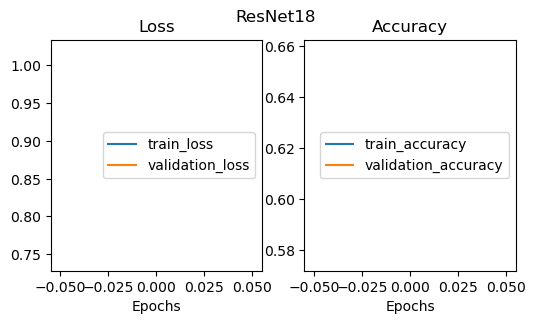

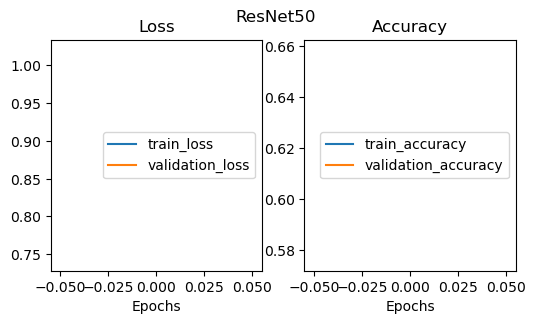

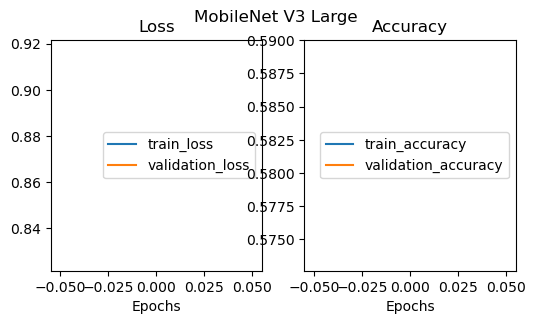

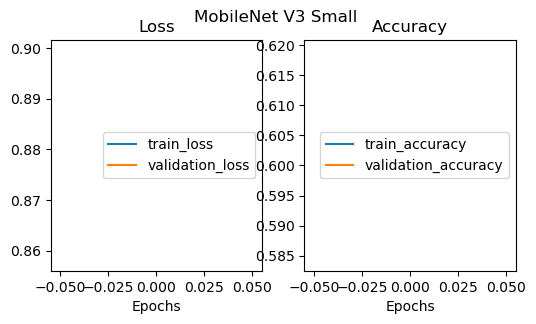

In [12]:
plot_loss_curves(train_resnet18_results,"ResNet18"), plot_loss_curves(train_resnet18_results,"ResNet50"),
plot_loss_curves(train_mobnet_lrg_results,"MobileNet V3 Large"), plot_loss_curves(train_mobnet_sml_results,"MobileNet V3 Small")

(None, None)

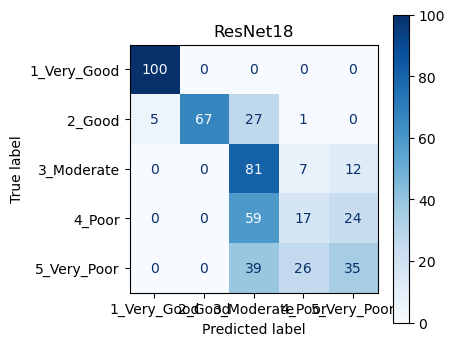

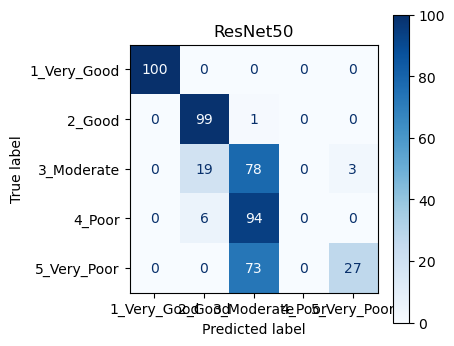

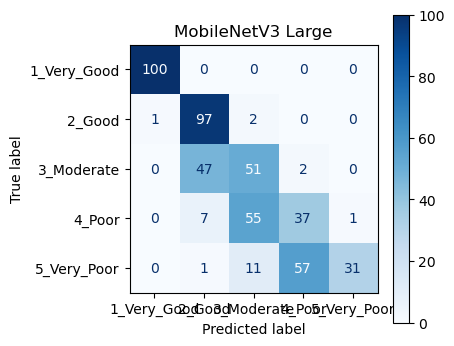

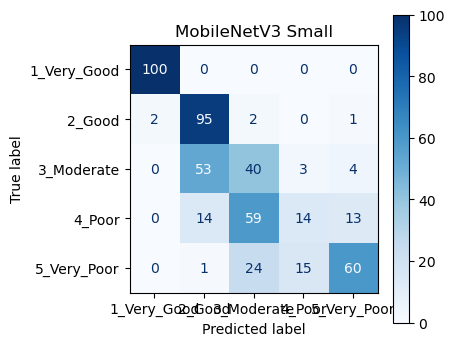

In [13]:
plot_confusion_matrix(resnet18,test_dl,device,class_names, "ResNet18"), plot_confusion_matrix(resnet50, test_dl, device, class_names, "ResNet50"),
plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names, "MobileNetV3 Large"), plot_confusion_matrix(mobnet_sml, test_dl, device, class_names, "MobileNetV3 Small")